In [1]:
# Import the necessary libraries
import requests
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the API endpoint and parameters
base_url = "https://api.worldbank.org/v2/country/all/indicator"
food_price_index_code = "FP.CPI.TOTL"  # Example indicator code for Food Price Index
inflation_code = "FP.CPI.TOTL"  # Example indicator code for Inflation
start_year = 2010
end_year = 2023
format_type = "json"

In [3]:
def fetch_data(indicator_code, start_year, end_year):
    url = f"{base_url}/{indicator_code}?date={start_year}:{end_year}&format={format_type}&per_page=2000"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()[1]
        return data
    else:
        print("Error fetching data:", response.status_code)
        return None

In [4]:
# Fetch data for Global Food Prices and Inflation
food_price_data = fetch_data(food_price_index_code, start_year, end_year)
inflation_data = fetch_data(inflation_code, start_year, end_year)

In [5]:
def convert_to_dataframe(data, indicator_name):
    df = pd.DataFrame(data)
    df = df[['countryiso3code', 'date', 'value']]
    df.columns = ['Country', 'Year', indicator_name]
    df['Year'] = pd.to_numeric(df['Year'])
    df[indicator_name] = pd.to_numeric(df[indicator_name], errors='coerce')
    return df

# Convert the fetched data into DataFrames
food_price_df = convert_to_dataframe(food_price_data, 'Food_Price_Index')
inflation_df = convert_to_dataframe(inflation_data, 'Inflation')

In [6]:
# Merge the two DataFrames on Country and Year
merged_df = pd.merge(food_price_df, inflation_df, on=['Country', 'Year'], how='inner')

In [7]:
# Drop any rows with missing data
merged_df.dropna(inplace=True)

# Display the first few rows of the merged DataFrame
merged_df.head()


,Country,Year,Food_Price_Index,Inflation
970,AFG,2019,149.895975,149.895975
971,AFG,2018,146.522482,146.522482
972,AFG,2017,145.610741,145.610741
973,AFG,2016,138.708666,138.708666
974,AFG,2015,132.883209,132.883209


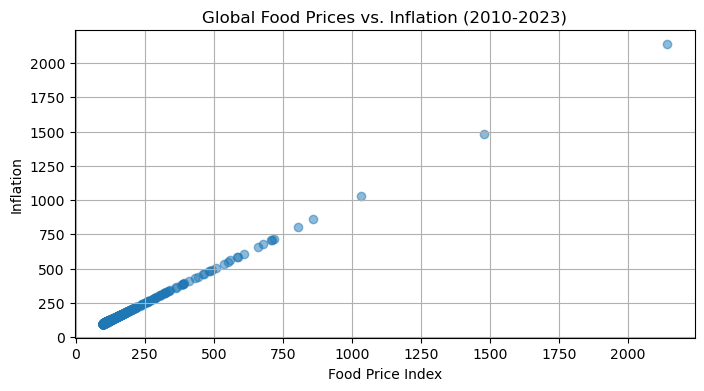

<Figure size 640x480 with 0 Axes>

In [9]:
# Plotting the relationship between Food Price Index and Inflation
plt.figure(figsize=(8, 4))
plt.scatter(merged_df['Food_Price_Index'], merged_df['Inflation'], alpha=0.5)
plt.title('Global Food Prices vs. Inflation (2010-2023)')
plt.xlabel('Food Price Index')
plt.ylabel('Inflation')
plt.grid(True)
plt.show()

#Save the plot as an image in the specified folder
folder_name = "Agricultural Images"
image_path = Path(folder_name, "Ed-compare_invsout.png")
plt.savefig(image_path)

In [ ]:
# Save the cleaned DataFrame to a CSV file
merged_df.to_csv('global_food_prices_inflation.csv', index=False)